 Pratiquez l'analyse de la variance sur le jeu de données du blé

Vous allez mener une ANOVA sur notre cas d'étude, en regardant précisément :
- une ANOVA à 1 facteur : la variété de blé ;
- une ANOVA à 1 facteur : le pesticide utilisé ;
- une ANOVA à 2 facteurs : la variété de blé ET le pesticide utilisé.

Dans tous les cas, nous cherchons à **comprendre si les facteurs ont une influence sur le rendement de blé.**

## Importez les données

On charge tout d'abord les librairies nécessaires pour réaliser ce TP :

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

Le fichier "ble.txt" contient les rendements de blé pour 80 parcelles en fonction de la variété de blé (V1, V2, V3 ou V4).

In [5]:
ble = pd.read_csv('ble.txt', sep=";", decimal='.')
ble.head()

,parcelle,variete,phyto,rdt
0,1,V1,Avec,5652
1,2,V1,Avec,5583
2,3,V1,Avec,5612
3,4,V1,Avec,5735
4,5,V1,Avec,5704


## Réalisez une ANOVA à 1 facteur

On veut étudier ici l'influence de la variété de blé sur le rendement.

On peut visualiser l'influence de la variété en affichant ces boîtes à moustaches :

On peut utiliser sns.boxplot() de Seaborn pour créer un graphique de boîte à moustaches comparant les rendements des différentes variétés de blé.

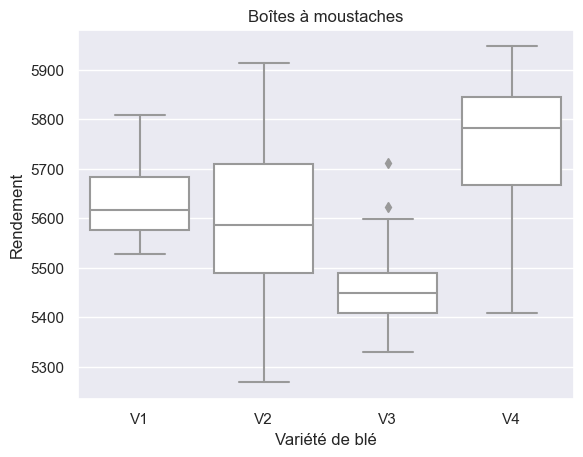

In [6]:
sns.set()

ax = sns.boxplot(x="variete", y="rdt", data=ble, color='white')
plt.xlabel('Variété de blé')
plt.ylabel('Rendement')
plt.title('Boîtes à moustaches')
plt.show()

Les 4 variétés semblent assez différentes, même si l'ordre de grandeur de ces écarts n'est pas très grand. La question sera de savoir si ces écarts sont significatifs ou pas.

*C'est l'ANOVA qui nous permettra de répondre à cette question.*

Étudions maintenant l'influence de la présence ou non de pesticide sur le rendement :

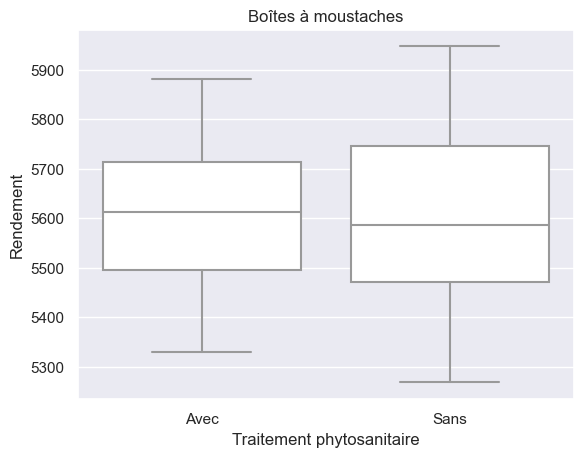

In [7]:
ax = sns.boxplot(x="phyto", y="rdt", data=ble, color='white')
plt.xlabel('Traitement phytosanitaire')
plt.ylabel('Rendement')
plt.title('Boîtes à moustaches')
plt.show()

Ici, les boîtes à moustaches ne sont pas très distinctes, même s'il y a un peu plus de variance dans le cas "SANS pesticide".

*La présence de pesticide a-t-elle un impact sur le rendement ? L'ANOVA nous permet de confirmer ou d'infirmer cette intuition.*

In [9]:
anova_variete = smf.ols('rdt ~ variete', data=ble).fit()
anova_table_variete = sm.stats.anova_lm(anova_variete, typ=2)
anova_table_variete


,sum_sq,df,F,PR(>F)
variete,851844.55,3.0,20.525327,7.674413e-10
Residual,1051387.00,76.0,NaN,NaN


On y voit les paramètres estimés (dans la colonne "Estimate"), mais ici, ce ne sont pas les paramètres qui nous intéressent le plus.

## Réalisez un test de Fisher

Ce qui nous intéresse réellement, c'est le **test de Fisher**.
La p-valeur de ce test ($7.67∗10^{-7}$) est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle $α_{1}=α_{2}=α_{3}=α_{4}=0$.

*La variété de blé a donc bien un effet sur le rendement, comme nous en avions l'intuition en regardant les boîtes à moustaches.*

Pour obtenir le tableau de l'analyse de la variance, on utilise la commande anova_lm :

In [6]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
variete,851844.55,3.0,20.525327,7.674413e-10
Residual,1051387.00,76.0,NaN,NaN


In [10]:
#le meme que le premier 
anova_phyto = smf.ols('rdt~phyto', data=ble).fit()
anova_table_phyto = sm.stats.anova_lm(anova_phyto, typ=2)
anova_table_phyto


,sum_sq,df,F,PR(>F)
phyto,1008.20,1.0,0.041341,0.839411
Residual,1902223.35,78.0,NaN,NaN


On trouve ici une p-valeur de 0.8, ce qui est très au-dessus de 5 %.
On ne rejette donc pas l'hypothèse H0 selon laquelle $α_{1}=α_{2}=0$.

Il n'y a pas ici d'effet du pesticide sur le rendement de blé, tout au moins pas d'effet significatif.

## Réalisez une ANOVA à 2 facteurs

Jusqu'ici, nous avons étudié les 2 facteurs (variété et pesticide) séparément. Cependant, la variété et le pesticide peuvent avoir des interactions qui influent sur le rendement.

En effet, même si l'on a montré que, globalement, le pesticide n'a pas d'effet sur le rendement, il se peut que, pour une variété précise, il y ait quand même un effet du pesticide sur le rendement.
L'ANOVA à 2 facteurs va nous permettre d'étudier ces éventuelles interactions :

On peut utiliser sm.stats.anova_lm() pour effectuer une analyse de variance (ANOVA) ,Cela permet d'évaluer la significativité globale du modèle et des termes individuels, y compris l'interaction entre variete et phyto.

In [30]:
anova_variete_phyto = smf.ols('rdt~variete*phyto', data=ble).fit()
print(anova_variete_phyto.summary())
sm.stats.anova_lm(anova_variete_phyto)


                            OLS Regression Results                            
Dep. Variable:                    rdt   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     8.458
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.62e-07
Time:                        12:49:59   Log-Likelihood:                -492.59
No. Observations:                  80   AIC:                             1001.
Df Residuals:                      72   BIC:                             1020.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

,df,sum_sq,mean_sq,F,PR(>F)
variete,3.0,851844.55,283948.183333,19.574935,2.205108e-09
phyto,1.0,1008.20,1008.200000,0.069504,7.928138e-01
variete:phyto,3.0,5968.20,1989.400000,0.137146,9.375236e-01
Residual,72.0,1044410.60,14505.702778,NaN,NaN


On voit sur le tableau 3 lignes :
- variete  : qui teste l'effet de la variété ;
- phyto  : qui teste l'effet du pesticide ;
- variete:phyto  : qui teste les interactions pesticide-variété.

La p-valeur des interactions (93,75 %) est très largement supérieure à 5 % ; on en déduit donc que les interactions n'ont pas d'impact sur le rendement.

*En pratique, on part toujours du tableau de l'ANOVA à 2 facteurs pour tester les interactions. Si elles sont significatives, on les conserve. Sinon, on teste séparément les 2 facteurs séparément par des ANOVA à 1 facteur.*

# ANOVA à mesures répétées (1 facteur)

# 1-Génération des données :

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [22]:
np.random.seed(42)
participants = np.arange(1, 21)
treatments = np.random.choice(['A', 'B', 'C'], size=60)
scores = np.random.normal(loc=70, scale=10, size=60)

# 2-Création du DataFrame :

In [23]:
df = pd.DataFrame({'Participant': np.repeat(participants, 3),
                   'Traitement': treatments,
                   'Score': scores})
df

,Participant,Traitement,Score
0,1,C,67.705495
1,1,A,73.893489
2,1,C,57.348809
3,2,C,80.919923
4,2,A,97.783130
5,2,A,81.936397
6,3,C,72.186383
7,3,B,78.817610
8,3,C,59.909147
9,4,C,54.167058


# 3-Visualisation des données :

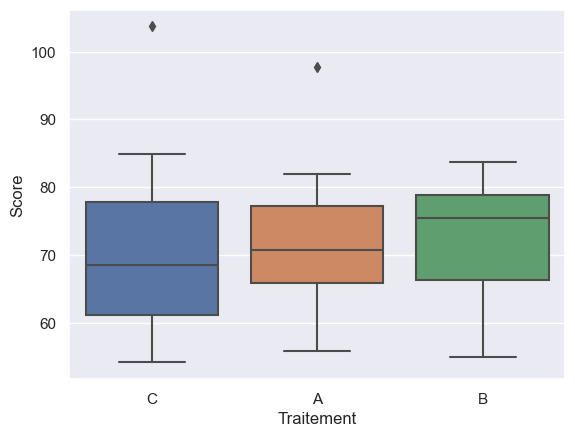

In [24]:
sns.boxplot(x='Traitement', y='Score', data=df)
plt.show()

# 4-Analyse de variance (ANOVA) :

In [25]:
anova_result = f_oneway(df['Score'][df['Traitement'] == 'A'],
                        df['Score'][df['Traitement'] == 'B'],
                        df['Score'][df['Traitement'] == 'C'])
print("Resultat d'ANOVA:")
print(anova_result)

Resultat d'ANOVA:
F_onewayResult(statistic=0.28892908870139145, pvalue=0.7501558075169078)
